In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [37]:
# Load the dataset
data = pd.read_csv("dataset full 9f.csv")

# Define the feature combinations to use
feature_combinations = [
    ["Ficket score", "CpG Island", "GC Content"],
    ["Hexamer Score", "ORF Length", "Transcript Length"],
    ["MFE Score", "ORF Ratio", "AT Dinucletide"],
    ["Ficket score", "CpG Island","AT Dinucletide"],
    ["Hexamer Score", "CpG Island","MFE Score"]
]
# Initialize the classifiers
clf1 = LogisticRegression(random_state = 2)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=50, random_state=0)

# Initialize lists to store the accuracies for each feature combination
accuracy1 = []
accuracy2 = []
accuracy3 = []


In [38]:
type(feature_combinations)

numpy.ndarray

In [39]:
# Loop through each feature combination
for features in feature_combinations:
    X = data[features]
    y = data.iloc[:, -1].values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the classifiers on the training set
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    
    # Predict the target values on the testing set
    y_pred1 = clf1.predict(X_test)
    y_pred2 = clf2.predict(X_test)
    y_pred3 = clf3.predict(X_test)
    
    # Calculate the accuracy for each classifier and store it in the corresponding list
    accuracy1.append(accuracy_score(y_test, y_pred1))
    accuracy2.append(accuracy_score(y_test, y_pred2))
    accuracy3.append(accuracy_score(y_test, y_pred3))
    

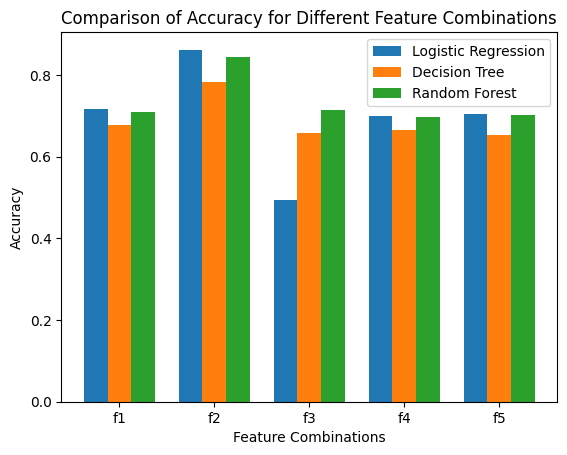

In [41]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Set the x-axis and y-axis labels and title
ax.set_xlabel("Feature Combinations")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Accuracy for Different Feature Combinations")

# Define the bar width and position
bar_width = 0.25
bar_pos = np.arange(len(feature_combinations))

# Create the bars for each classifier
bar1 = ax.bar(bar_pos, accuracy1, width=bar_width, label="Logistic Regression")
bar2 = ax.bar(bar_pos + bar_width, accuracy2, width=bar_width, label="Naive Bayes")
bar3 = ax.bar(bar_pos + bar_width * 2, accuracy3, width=bar_width, label="Random Forest")

# Set the x-axis tick labels
ax.set_xticks(bar_pos + bar_width)
ax.set_xticklabels(["f1","f2","f3","f4","f5"])

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()